In [1]:
# import packages:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# reading in data:
home_own_data = pd.read_csv('home_ownership_data.csv')
loan_data = pd.read_csv('loan_data.csv')

In [3]:
# visualizing data
home_own_data.head()

member_id home_ownership
0    1030901       MORTGAGE
1    1247741       MORTGAGE
2    1261745       MORTGAGE
3    1264291           RENT
4    1269083           RENT

In [4]:
loan_data.head()

member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0    1296599       5000         5000           4975.0   36 months     10.65   
1    1314167       2500         2500           2500.0   60 months     15.27   
2    1313524       2400         2400           2400.0   36 months     15.96   
3    1277178      10000        10000          10000.0   36 months     13.49   
4    1311748       3000         3000           3000.0   60 months     12.69   

   installment grade sub_grade emp_length  ...  recoveries  \
0       162.87     B        B2  10+ years  ...        0.00   
1        59.83     C        C4   < 1 year  ...      117.08   
2        84.33     C        C5  10+ years  ...        0.00   
3       339.31     C        C1  10+ years  ...        0.00   
4        67.79     B        B5     1 year  ...        0.00   

  collection_recovery_fee last_pymnt_amnt last_credit_pull_d  \
0                    0.00          171.62             16-Jan   
1                    1.11          119.66             13-Sep   
2                    0.00          649.91             16-Jan   
3                    0.00          357.48             15-Jan   
4                    0.00           67.79             16-Jan   

  collections_12_mths_ex_med application_type acc_now_delinq  tot_coll_amt  \
0                          0       INDIVIDUAL              0           NaN   
1                          0       INDIVIDUAL              0           NaN   
2                          0       INDIVIDUAL              0           NaN   
3                          0       INDIVIDUAL              0           NaN   
4                          0       INDIVIDUAL              0           NaN   

   tot_cur_bal  total_rev_hi_lim  
0          NaN               NaN  
1          NaN               NaN  
2          NaN               NaN  
3          NaN               NaN  
4          NaN               NaN  

[5 rows x 40 columns]

home_ownership   loan_amount
0       MORTGAGE  13502.830189
1            OWN   9603.571429
2           RENT  11067.481203

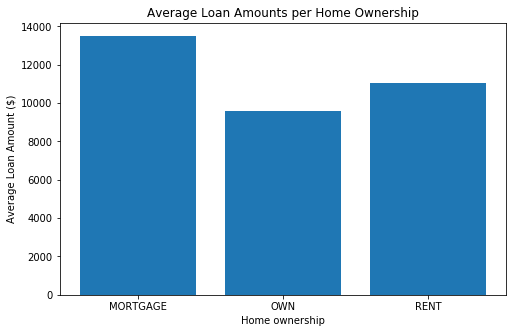

In [19]:
# merging data sets by member_id:
data = pd.merge(loan_data, home_own_data, how = 'left', left_on = 'member_id', right_on = 'member_id')[['member_id','loan_amnt','home_ownership']]

# grouping data by home_ownership, then finding average loan_amnt in each group:
parsed_data = data.groupby('home_ownership')['loan_amnt'].agg(loan_amount = np.mean)
list(parsed_data.index)
# plotting

plt.figure(figsize = (8, 5))
plt.bar(list(parsed_data.index), parsed_data['loan_amount'])
plt.title('Average Loan Amounts per Home Ownership')
plt.ylabel('Average Loan Amount ($)')
plt.xlabel('Home ownership')

parsed_data.reset_index()